In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns=None
pd.options.mode.chained_assignment = None

In [2]:
asp = pd.read_excel(r'/home/kusapochka/aspiranti/asp_nov.xls')

In [3]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       1582 non-null   int64 
 1   ФИО                        1582 non-null   object
 2   Номер ЛД                   1582 non-null   int64 
 3   Подразделение              1582 non-null   object
 4   Специальность/направление  1582 non-null   object
 5   Курс по порядку            1582 non-null   int64 
 6   Состояние                  1582 non-null   object
 7   Гражданство                1582 non-null   object
 8   Дата рождения              1582 non-null   object
 9   Начало проживания          1085 non-null   object
 10  Окончание проживания       1085 non-null   object
 11  Дисциплина                 951 non-null    object
 12  Оценка (успеваемость)      937 non-null    object
 13  Полугодие                  951 non-null    object
 14  Учебный 

In [4]:
asp[asp['Номер ЛД'] == 2200674]

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Курс по порядку,Состояние,Гражданство,Дата рождения,Начало проживания,Окончание проживания,Дисциплина,Оценка (успеваемость),Полугодие,Учебный год,Структурное подразделение
0,1,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,3,Аспирант,Ирак,11.05.1981,01.09.2024,31.08.2026,NaN,NaN,NaN,NaN,NaN


In [5]:
asp['Подразделение'].value_counts()

Подразделение
Институт экотехнологий и инжиниринга                                                              464
Институт новых материалов и нанотехнологий                                                        414
Горный институт                                                                                   392
Институт информационных технологий и компьютерных наук                                            123
Институт физики и квантовой инженерии                                                              74
ММТ факультет/Б                                                                                    31
Институт экономики и управления промышленными предприятиями имени Владимира Андреевича Роменца     30
Институт базового образования                                                                      21
АИТ факультет/Б                                                                                    15
Институт биомедицинской инженерии                                   

In [6]:
nuli = asp[asp['Оценка (успеваемость)'].isna()]

In [7]:
nuli['Номер ЛД'].nunique()

638

In [8]:
nuli.head(3)

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Курс по порядку,Состояние,Гражданство,Дата рождения,Начало проживания,Окончание проживания,Дисциплина,Оценка (успеваемость),Полугодие,Учебный год,Структурное подразделение
0,1,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,3,Аспирант,Ирак,11.05.1981,01.09.2024,31.08.2026,NaN,NaN,NaN,NaN,NaN
9,10,Абдурашидов Шерзод Шухрат Угли,2210009,Институт экотехнологий и инжиниринга,Обработка металлов давлением,3,Аспирант,Узбекистан,26.09.1994,01.09.2024,30.06.2026,NaN,NaN,NaN,NaN,НИТУ МИСИС
10,11,Абедалхуссайн Ахмед Али Абедалхуссайн,2416101,Институт информационных технологий и компьютерных наук,"Системный анализ, управление и обработка информации, статистика",1,Аспирант,Ирак,15.07.1982,01.07.2022,31.07.2022,NaN,NaN,NaN,NaN,НИТУ МИСИС


In [9]:
nuli['Курс по порядку'].value_counts()

Курс по порядку
1    248
2    213
3    169
4     15
Name: count, dtype: int64

In [10]:
asp['Оценка (успеваемость)'].value_counts()

Оценка (успеваемость)
Отлично              545
зачтено              282
Хорошо                96
Удовлетворительно     14
Name: count, dtype: int64

In [11]:
asp['Курс по порядку'].value_counts()

Курс по порядку
4    952
1    248
2    213
3    169
Name: count, dtype: int64

In [12]:
asp['Полугодие'].value_counts()

Полугодие
I полугодие    951
Name: count, dtype: int64

In [13]:
asp['Учебный год'].value_counts()

Учебный год
2021 - 2022    951
Name: count, dtype: int64

In [14]:
asp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   №п/п                       1582 non-null   int64 
 1   ФИО                        1582 non-null   object
 2   Номер ЛД                   1582 non-null   int64 
 3   Подразделение              1582 non-null   object
 4   Специальность/направление  1582 non-null   object
 5   Курс по порядку            1582 non-null   int64 
 6   Состояние                  1582 non-null   object
 7   Гражданство                1582 non-null   object
 8   Дата рождения              1582 non-null   object
 9   Начало проживания          1085 non-null   object
 10  Окончание проживания       1085 non-null   object
 11  Дисциплина                 951 non-null    object
 12  Оценка (успеваемость)      937 non-null    object
 13  Полугодие                  951 non-null    object
 14  Учебный 

In [15]:
asp['Номер ЛД'].nunique()

767

### анализируем

In [16]:
asp.head(3)

,№п/п,ФИО,Номер ЛД,Подразделение,Специальность/направление,Курс по порядку,Состояние,Гражданство,Дата рождения,Начало проживания,Окончание проживания,Дисциплина,Оценка (успеваемость),Полугодие,Учебный год,Структурное подразделение
0,1,Аббас Майтхам Худайр Аббас,2200674,Горный институт,Электротехнические комплексы и системы,3,Аспирант,Ирак,11.05.1981,01.09.2024,31.08.2026,NaN,NaN,NaN,NaN,NaN
1,2,Абдукодиров Абдулла Абдумалик Угли,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Cвойства наносистем,зачтено,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий
2,3,Абдукодиров Абдулла Абдумалик Угли,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Аспирант,Узбекистан,25.06.1996,01.09.2024,31.08.2025,Иностранный язык,Хорошо,I полугодие,2021 - 2022,Институт новых материалов и нанотехнологий


In [17]:
asp['date'] = asp['Учебный год'] + asp['Полугодие'] 
asp['date'] = asp['date'].str.strip()

In [18]:
asp = asp.drop(columns = ['№п/п','ФИО','Состояние','Полугодие','Учебный год'])

In [19]:
asp=asp.rename(columns={'Номер ЛД':'ld_number','Специальность/направление':'faculty',
                        'Дисциплина':'subject','Оценка (успеваемость)':'marks','Подразделение':'institue','Курс по порядку':'course','Гражданство':'country','Дата рождения':'birthday',
                        'Начало проживания':'start_living','Окончание проживания':'the_end','Структурное подразделение':'institue_subject'})

In [20]:
asp = asp[~ asp['institue'].str.contains('/Б',na = False)]

In [21]:
asp['start_living'] = pd.to_datetime(asp['start_living'], errors='coerce')
asp['the_end'] = pd.to_datetime(asp['the_end'], errors='coerce')


/tmp/ipykernel_168399/1309706733.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  asp['the_end'] = pd.to_datetime(asp['the_end'], errors='coerce')


In [22]:
asp.head()

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date
0,2200674,Горный институт,Электротехнические комплексы и системы,3,Ирак,11.05.1981,2024-01-09,2026-08-31,NaN,NaN,NaN,NaN
1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Cвойства наносистем,зачтено,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие
2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Иностранный язык,Хорошо,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие
3,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,История и философия науки,Отлично,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие
4,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Научно-исследовательская деятельность и подготовка научно-квалификационной работы (диссертации),Отлично,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие


In [23]:
asp['time_living'] = (asp['the_end'] - asp['start_living']).dt.days

In [24]:
asp['time_living'] = asp['time_living'].apply(lambda x: 0 if x<0 else x)

In [25]:
asp['marks'].fillna(2,inplace=True)

/tmp/ipykernel_168399/817495089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  asp['marks'].fillna(2,inplace=True)


In [26]:
asp['marks'].value_counts()

marks
2                    610
Отлично              529
зачтено              279
Хорошо                95
Удовлетворительно     14
Name: count, dtype: int64

In [27]:
dictik ={'Отлично':5,'зачтено':4,'Хорошо':4,'Удовлетворительно':3}

In [28]:
asp['marks'].replace(dictik,inplace=True)

/tmp/ipykernel_168399/3958980864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  asp['marks'].replace(dictik,inplace=True)


In [29]:
asp['marks'].value_counts()

marks
2    610
5    529
4    374
3     14
Name: count, dtype: int64

In [30]:
asp['marks'].value_counts()

marks
2    610
5    529
4    374
3     14
Name: count, dtype: int64

In [31]:
# только 4 курс 
asp4 = asp[asp['course'] == 4]

In [32]:
asp4['course'].value_counts()

course
4    927
Name: count, dtype: int64

In [33]:
asp4.drop_duplicates(subset= 'ld_number')['start_living'].value_counts()

start_living
2024-01-09    75
2023-01-09     7
2021-01-09     6
2021-01-04     1
2019-01-10     1
2021-01-07     1
2020-01-03     1
2019-01-09     1
2020-01-02     1
2021-07-09     1
2016-01-09     1
2022-01-07     1
2019-01-07     1
2015-01-08     1
Name: count, dtype: int64

### стастика для всех по странам

In [34]:
asp.head(3)

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living
0,2200674,Горный институт,Электротехнические комплексы и системы,3,Ирак,11.05.1981,2024-01-09,2026-08-31,NaN,2,NaN,NaN,965.0
1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Cвойства наносистем,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Иностранный язык,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0


In [35]:
asp_unique = asp.drop_duplicates(subset = 'ld_number')

In [36]:
asp_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 1581
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ld_number         730 non-null    int64         
 1   institue          730 non-null    object        
 2   faculty           730 non-null    object        
 3   course            730 non-null    int64         
 4   country           730 non-null    object        
 5   birthday          730 non-null    object        
 6   start_living      436 non-null    datetime64[ns]
 7   the_end           462 non-null    datetime64[ns]
 8   subject           130 non-null    object        
 9   marks             730 non-null    int64         
 10  institue_subject  606 non-null    object        
 11  date              130 non-null    object        
 12  time_living       436 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 79.8+ KB


### количество аспирантов на каждом курсе 

In [37]:
asp_courses = asp_unique['course'].value_counts().reset_index()

In [38]:
asp_courses

,course,count
0,1,237
1,2,203
2,3,160
3,4,130


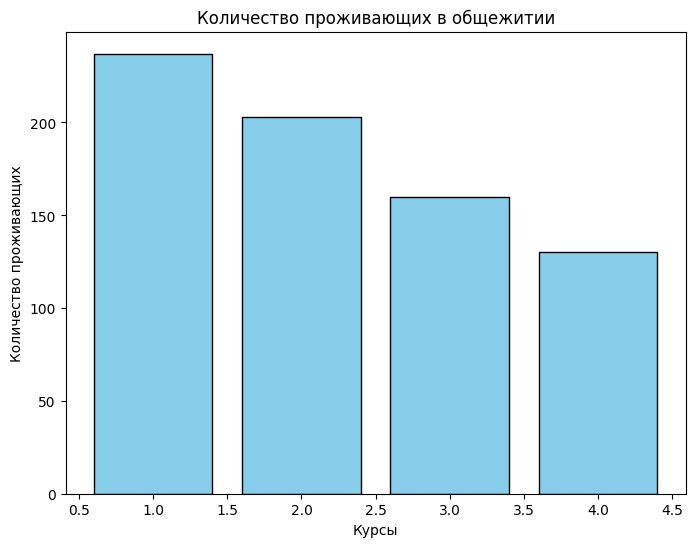

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(asp_courses['course'], asp_courses['count'], color='skyblue', edgecolor='black')

# добавляем заголовок и подписи к осям
plt.title('Количество проживающих в общежитии')
plt.xlabel('Курсы')
plt.ylabel('Количество проживающих')

plt.show()

In [40]:
asp_unique['country'].value_counts().index

Index(['Российская Федерация', 'Ирак', 'Узбекистан', 'Казахстан', 'Ангола',
       'Сирийская Арабская Республика', 'Таджикистан',
       'Иран, Исламская Республика', 'Нигерия', 'Китай', 'Мьянма', 'Куба',
       'Уганда', 'Молдова', 'Туркмения', 'Йемен', 'Эфиопия', 'Бурунди',
       'Армения', 'Гвинея', 'Зимбабве', 'Беларусь',
       'Танзания, Объединенная Республика', 'Украина', 'Мали', 'Нигер', 'Перу',
       'Кения', 'Вьетнам', 'Эквадор', 'Иордания', 'Алжир', 'Колумбия',
       'Венесуэла Боливарианская Республика', 'Сьерра-Леоне', 'Сомали',
       'Нидерланды', 'Кот Д'ивуар'],
      dtype='object', name='country')

In [41]:
country_list = asp_unique['country'].value_counts().index[:7]

In [42]:
country_list

Index(['Российская Федерация', 'Ирак', 'Узбекистан', 'Казахстан', 'Ангола',
       'Сирийская Арабская Республика', 'Таджикистан'],
      dtype='object', name='country')

In [43]:
asp_unique['country_check'] = asp_unique['country'].apply(lambda x: x if x in country_list else 'Другие страны') 

In [44]:
countries = asp_unique['country_check'].value_counts()

In [45]:
countries

country_check
Российская Федерация             612
Другие страны                     56
Ирак                              14
Узбекистан                        14
Казахстан                         14
Ангола                             8
Сирийская Арабская Республика      7
Таджикистан                        5
Name: count, dtype: int64

In [46]:
countries_percentage = countries/countries.sum()*100

### по странам

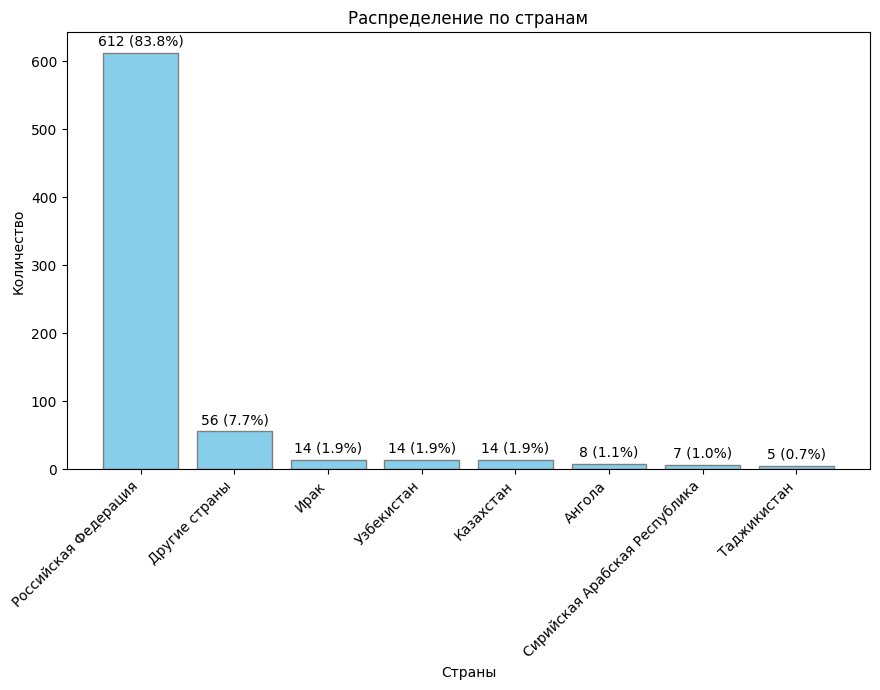

In [85]:
plt.figure(figsize=(9, 7))

# создаем гистограмму
plt.bar(countries.index, countries, color='skyblue', edgecolor='gray')

# добавляем метки для каждого столбца с указанием количества и процента
for index, (count, percent) in enumerate(zip(countries, countries_percentage)):
    plt.text(index, count + max(countries) * 0.01, f'{count} ({percent:.1f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# добавляем подписи к осям и заголовок
plt.xlabel("Страны")
plt.ylabel("Количество")
plt.title("Распределение по странам")

plt.xticks(rotation=45, ha='right')  # поворачиваем метки стран для удобства чтения
plt.tight_layout()  # корректируем расположение элементов для избежания наложений
plt.show()

In [48]:
# общежитие
asp_unique.head(1)

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living,country_check
0,2200674,Горный институт,Электротехнические комплексы и системы,3,Ирак,11.05.1981,2024-01-09,2026-08-31,NaN,2,NaN,NaN,965.0,Ирак


In [49]:
asp_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 1581
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ld_number         730 non-null    int64         
 1   institue          730 non-null    object        
 2   faculty           730 non-null    object        
 3   course            730 non-null    int64         
 4   country           730 non-null    object        
 5   birthday          730 non-null    object        
 6   start_living      436 non-null    datetime64[ns]
 7   the_end           462 non-null    datetime64[ns]
 8   subject           130 non-null    object        
 9   marks             730 non-null    int64         
 10  institue_subject  606 non-null    object        
 11  date              130 non-null    object        
 12  time_living       436 non-null    float64       
 13  country_check     730 non-null    object        
dtypes: datetime64[ns](2), float64(

In [50]:
asp_unique['country'].value_counts()

country
Российская Федерация                   612
Ирак                                    14
Узбекистан                              14
Казахстан                               14
Ангола                                   8
Сирийская Арабская Республика            7
Таджикистан                              5
Иран, Исламская Республика               4
Нигерия                                  4
Китай                                    4
Мьянма                                   4
Куба                                     3
Уганда                                   3
Молдова                                  3
Туркмения                                2
Йемен                                    2
Эфиопия                                  2
Бурунди                                  2
Армения                                  2
Гвинея                                   2
Зимбабве                                 2
Беларусь                                 1
Танзания, Объединенная Республика        1
Укр

In [51]:
asp_unique['start_living'].fillna('не общежитие',inplace=True)

/tmp/ipykernel_168399/2502569144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  asp_unique['start_living'].fillna('не общежитие',inplace=True)
/tmp/ipykernel_168399/2502569144.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'не общежитие' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  asp_unique['start_living'].fillna('не общежитие',inplace=True)


In [52]:
asp_unique['start_living'].value_counts()

start_living
2024-01-09 00:00:00    328
не общежитие           294
2023-01-09 00:00:00     24
2021-01-09 00:00:00     20
2024-09-09 00:00:00      7
2024-01-07 00:00:00      5
2022-01-07 00:00:00      4
2022-01-09 00:00:00      3
2018-01-09 00:00:00      3
2024-10-09 00:00:00      2
2023-01-07 00:00:00      2
2019-01-03 00:00:00      2
2020-01-07 00:00:00      2
2022-01-06 00:00:00      2
2022-01-08 00:00:00      2
2019-01-09 00:00:00      2
2022-01-04 00:00:00      1
2016-01-09 00:00:00      1
2015-01-08 00:00:00      1
2017-01-09 00:00:00      1
2024-10-06 00:00:00      1
2015-01-09 00:00:00      1
2020-06-09 00:00:00      1
2024-04-10 00:00:00      1
2020-01-09 00:00:00      1
2017-01-07 00:00:00      1
2024-01-10 00:00:00      1
2022-01-12 00:00:00      1
2024-07-10 00:00:00      1
2019-01-07 00:00:00      1
2015-04-09 00:00:00      1
2021-01-04 00:00:00      1
2021-01-10 00:00:00      1
2023-05-12 00:00:00      1
2021-07-09 00:00:00      1
2020-01-11 00:00:00      1
2020-01-02 00:0

In [53]:

obsh = pd.DataFrame(asp_unique.groupby('course')['start_living'].apply(lambda x: x[x != 'не общежитие'].count())).reset_index()

In [54]:
obsh.loc[obsh.shape[0]] =['не общежитие','489']

In [55]:
obsh['course'] = obsh['course'].astype(str)

In [56]:
obsh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course        5 non-null      object
 1   start_living  5 non-null      object
dtypes: object(2)
memory usage: 120.0+ bytes


In [57]:
obsh['start_living'] = pd.to_numeric(obsh['start_living'])

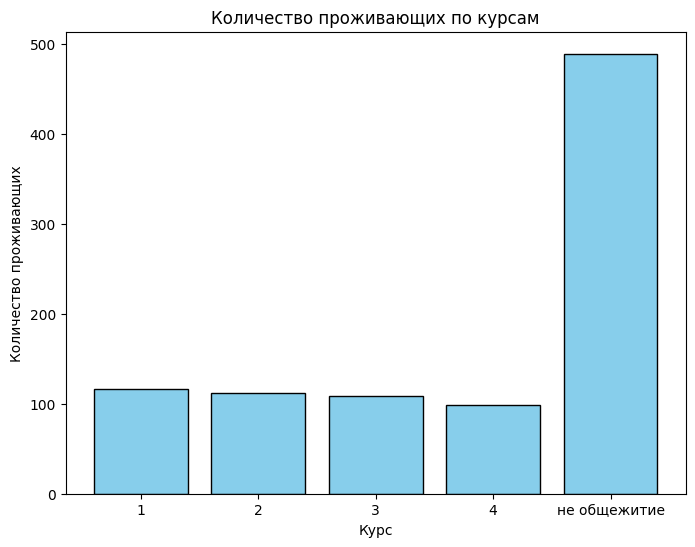

In [58]:

# строим столбчатую диаграмму для всех значений, включая 'не общежитие'
plt.figure(figsize=(8, 6))
plt.bar(obsh['course'], obsh['start_living'], color='skyblue', edgecolor='black')

# добавляем заголовок и подписи к осям
plt.title('Количество проживающих по курсам')
plt.xlabel('Курс')
plt.ylabel('Количество проживающих')

# отображаем график
plt.show()

### только 4 курс

### время в общаге

In [59]:
asp4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 1 to 1577
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ld_number         927 non-null    int64         
 1   institue          927 non-null    object        
 2   faculty           927 non-null    object        
 3   course            927 non-null    int64         
 4   country           927 non-null    object        
 5   birthday          927 non-null    object        
 6   start_living      701 non-null    datetime64[ns]
 7   the_end           723 non-null    datetime64[ns]
 8   subject           927 non-null    object        
 9   marks             927 non-null    int64         
 10  institue_subject  407 non-null    object        
 11  date              927 non-null    object        
 12  time_living       701 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 101.4+ KB


In [60]:
asp4_unique = asp4.drop_duplicates(subset='ld_number')

In [61]:
obsh_4 = pd.DataFrame(asp4_unique['time_living'].value_counts()).reset_index()

In [62]:
obsh_4.head(1)

,time_living,count
0,600.0,64


In [63]:
min_4 = obsh_4['time_living'].min()
max_4 = obsh_4['time_living'].max()
bins = np.linspace(min_4,max_4, num=7).tolist() 

In [64]:
obsh_4['time_category'] = pd.cut(obsh_4['time_living'], bins=bins, include_lowest=True)

In [65]:
obsh_4

,time_living,count,time_category
0,600.0,64,"(542.667, 785.0]"
1,538.0,7,"(300.333, 542.667]"
2,569.0,4,"(542.667, 785.0]"
3,296.0,3,"(57.999, 300.333]"
4,1268.0,2,"(1027.333, 1269.667]"
5,387.0,2,"(300.333, 542.667]"
6,476.0,1,"(300.333, 542.667]"
7,415.0,1,"(300.333, 542.667]"
8,933.0,1,"(785.0, 1027.333]"
9,872.0,1,"(785.0, 1027.333]"


In [66]:
time_4_plot = obsh_4.groupby('time_category')['count'].sum().reset_index()

/tmp/ipykernel_168399/1146915115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_4_plot = obsh_4.groupby('time_category')['count'].sum().reset_index()


In [67]:
time_4_plot

,time_category,count
0,"(57.999, 300.333]",7
1,"(300.333, 542.667]",13
2,"(542.667, 785.0]",73
3,"(785.0, 1027.333]",3
4,"(1027.333, 1269.667]",2
5,"(1269.667, 1512.0]",1


In [68]:
time_4_plot['year'] = ['меньше 1 года','1 год - 1.5 года','1.5-2 года','от 2 до 3 лет','от 3 до 4 лет','больше 4 лет']

Text(0, 0.5, 'Количество проживающих')

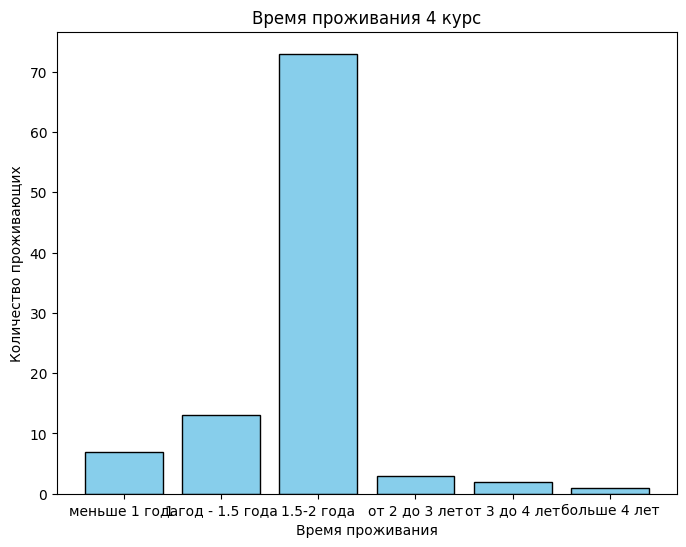

In [69]:

# строим столбчатую диаграмму для всех значений, включая 'не общежитие'
plt.figure(figsize=(8, 6))
plt.bar(time_4_plot['year'], time_4_plot['count'], color='skyblue', edgecolor='black')

# добавляем заголовок и подписи к осям
plt.title('Время проживания 4 курс')
plt.xlabel('Время проживания')
plt.ylabel('Количество проживающих')

In [70]:
asp.head()

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living
0,2200674,Горный институт,Электротехнические комплексы и системы,3,Ирак,11.05.1981,2024-01-09,2026-08-31,NaN,2,NaN,NaN,965.0
1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Cвойства наносистем,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Иностранный язык,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
3,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,История и философия науки,5,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
4,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Научно-исследовательская деятельность и подготовка научно-квалификационной работы (диссертации),5,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0


### общая круговая диаграмма с оценками 

In [71]:
# считаем количество оценок и процент
marks_counts = asp4['marks'].value_counts()
marks_percentages = marks_counts / marks_counts.sum() * 100


In [72]:
marks_counts

marks
5    529
4    374
3     14
2     10
Name: count, dtype: int64

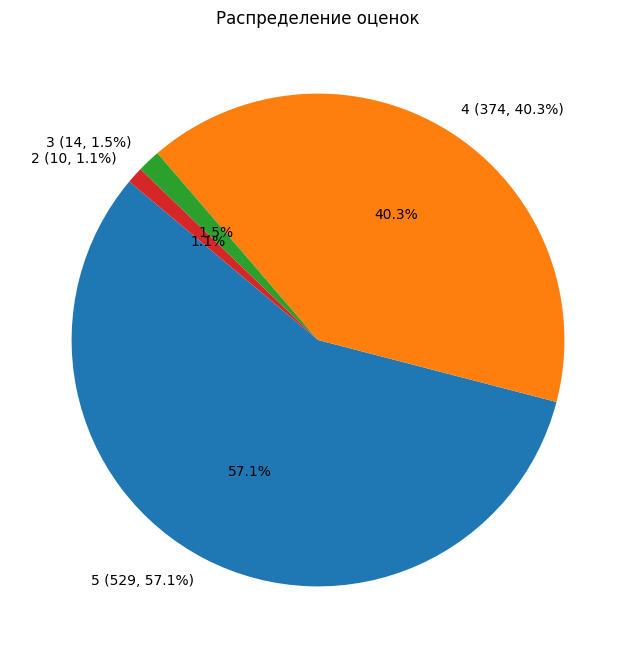

In [73]:

# строим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(marks_counts, labels=[f'{mark} ({count}, {percent:.1f}%)'
                              for mark, count, percent in zip(marks_counts.index, marks_counts, marks_percentages)],
        autopct='%1.1f%%', startangle=140)
plt.title("Распределение оценок")
plt.show()

In [74]:
asp4.head()

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living
1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Cвойства наносистем,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
2,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Иностранный язык,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
3,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,История и философия науки,5,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
4,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Научно-исследовательская деятельность и подготовка научно-квалификационной работы (диссертации),5,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0
5,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Педагогика высшей школы,5,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0


### график успеваемости по предметам 

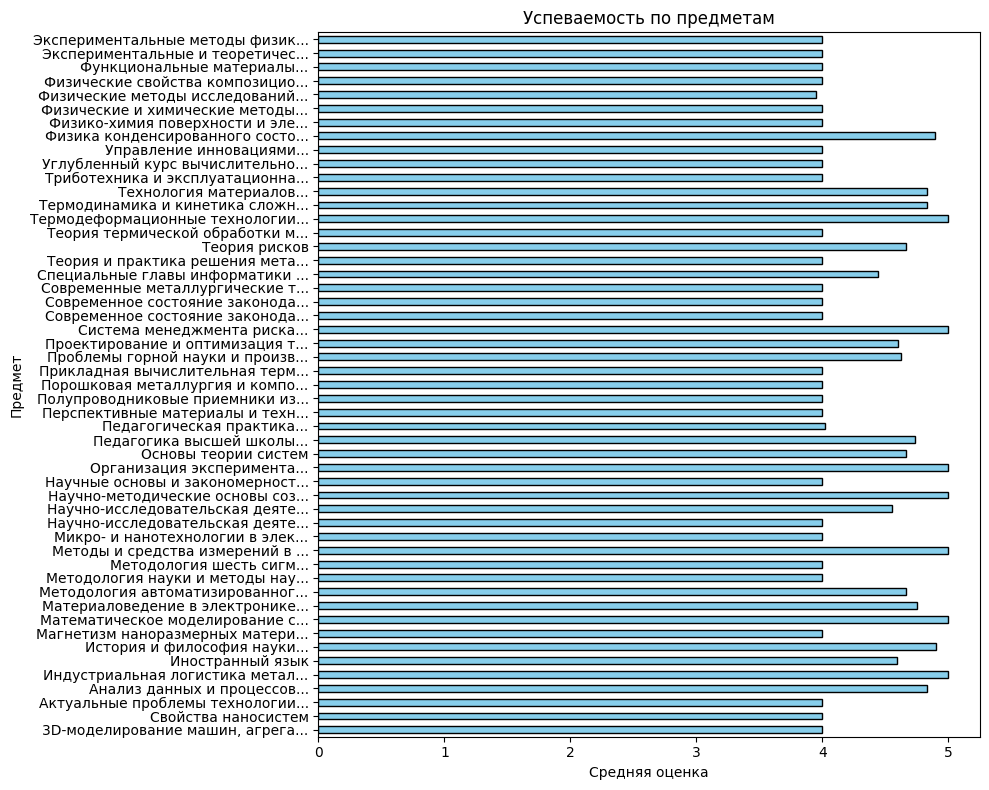

In [75]:
# группируем данные по столбцу subject и считаем среднюю оценку
course_performance = asp4.groupby('subject')['marks'].mean()

# сокращаем длину названий предметов
course_performance.index = [f"{subject[:30]}..." if len(subject) > 20 else subject for subject in course_performance.index]

# строим столбчатый график успеваемости по предметам
plt.figure(figsize=(10, 8))  # увеличиваем высоту графика для лучшего отображения длинных названий
course_performance.plot(kind='barh', color='skyblue', edgecolor='black')  # barh для горизонтального графика

# добавляем заголовок и подписи к осям
plt.title('Успеваемость по предметам')
plt.xlabel('Средняя оценка')
plt.ylabel('Предмет')

# уменьшаем интервалы между надписями
plt.tight_layout()

# отображаем график
plt.show()

### график успеваемости по институтам

In [76]:
asp.head(1)

,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living
0,2200674,Горный институт,Электротехнические комплексы и системы,3,Ирак,11.05.1981,2024-01-09,2026-08-31,NaN,2,NaN,NaN,965.0


In [77]:
insititue_performance = asp4.groupby('institue')['marks'].mean()

In [78]:
insititue_performance

institue
Горный институт                                           4.400901
Институт базового образования                             4.562500
Институт информационных технологий и компьютерных наук    4.560606
Институт новых материалов и нанотехнологий                4.562963
Институт физики и квантовой инженерии                     4.428571
Институт экотехнологий и инжиниринга                      4.615132
Name: marks, dtype: float64

<Figure size 640x480 with 0 Axes>

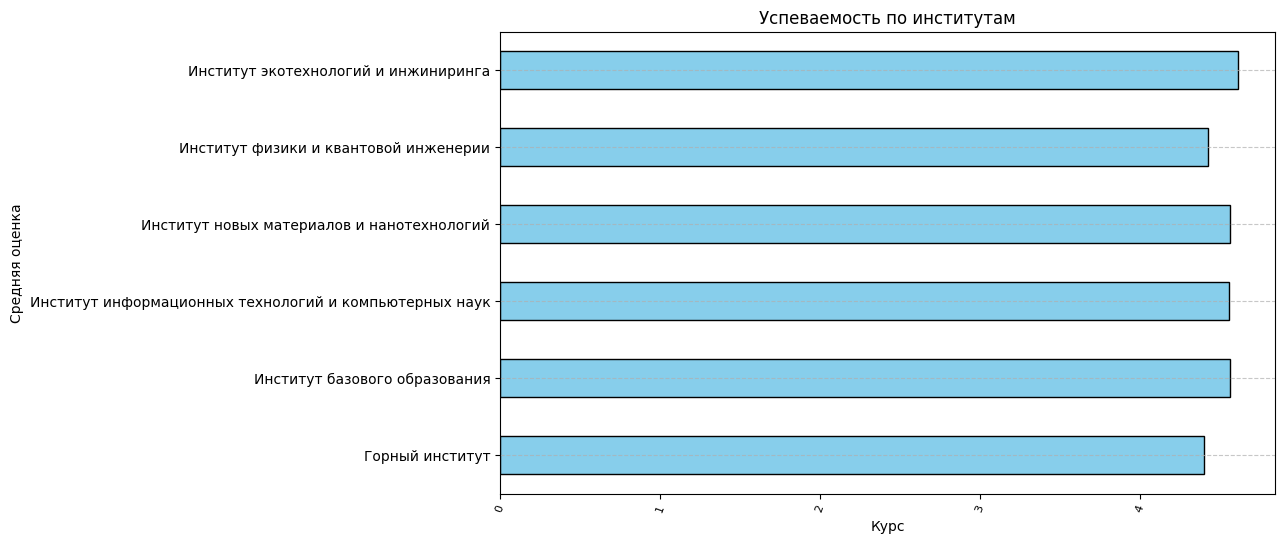

In [79]:
plt.subplots_adjust(bottom=0.11)
plt.figure(figsize=(10, 6))
insititue_performance.plot(kind='barh',color = 'skyblue', edgecolor='black')
plt.title('Успеваемость по институтам')
plt.xlabel('Курс')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=70,fontsize= 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()

In [80]:
### график успеваемости по странам

In [81]:
asp4.head(1)


,ld_number,institue,faculty,course,country,birthday,start_living,the_end,subject,marks,institue_subject,date,time_living
1,2100847,Институт новых материалов и нанотехнологий,Технологии материалов,4,Узбекистан,25.06.1996,2024-01-09,2025-08-31,Cвойства наносистем,4,Институт новых материалов и нанотехнологий,2021 - 2022I полугодие,600.0


In [82]:
country_performance = asp4.groupby('country')['marks'].mean()
country_performance


country
Ангола                           4.500000
Армения                          4.428571
Вьетнам                          4.428571
Иордания                         4.625000
Ирак                             4.625000
Казахстан                        4.333333
Кения                            4.714286
Китай                            4.444444
Мали                             4.571429
Молдова                          4.444444
Мьянма                           4.416667
Российская Федерация             4.540431
Сирийская Арабская Республика    4.800000
Узбекистан                       4.583333
Name: marks, dtype: float64

<Figure size 640x480 with 0 Axes>

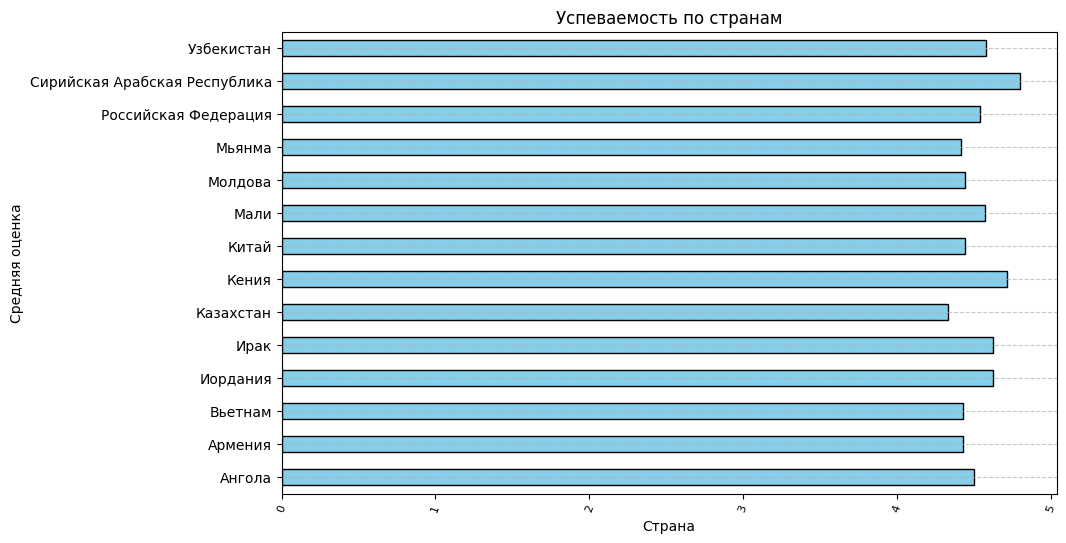

In [83]:
plt.subplots_adjust(bottom=0.11)
plt.figure(figsize=(10, 6))
country_performance.plot(kind='barh',color = 'skyblue', edgecolor='black')
plt.title('Успеваемость по странам')
plt.xlabel('Страна')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=70,fontsize= 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.show()